In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score,confusion_matrix
from imblearn.under_sampling import RandomUnderSampler



In [2]:
!pip install ydata-profiling

In [3]:
# Load the dataset
data = pd.read_csv("credit card.csv")


In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
data.head()



First few rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Display the last few rows of the dataset
print("\nLast few rows of the dataset:")
data.tail()




Last few rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# Display statistical description of the dataset

data.describe()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Display information about the dataset
print("\nInformation about the dataset:")
print(data.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 n

In [8]:
data.shape

(284807, 31)

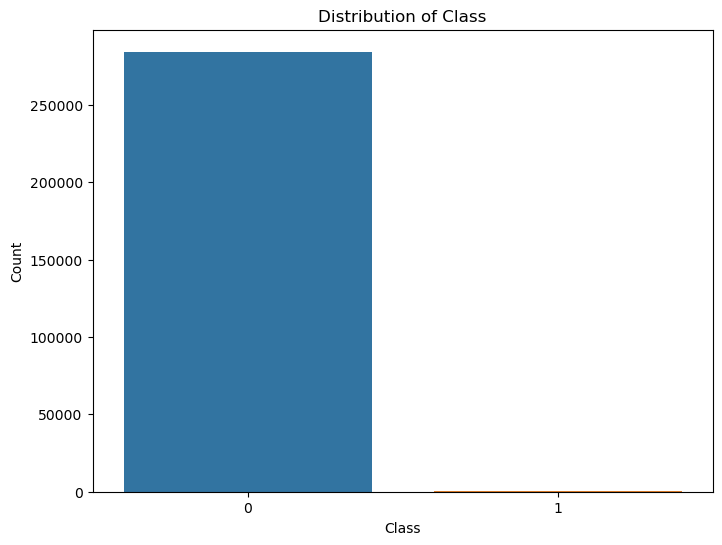

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'Class' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

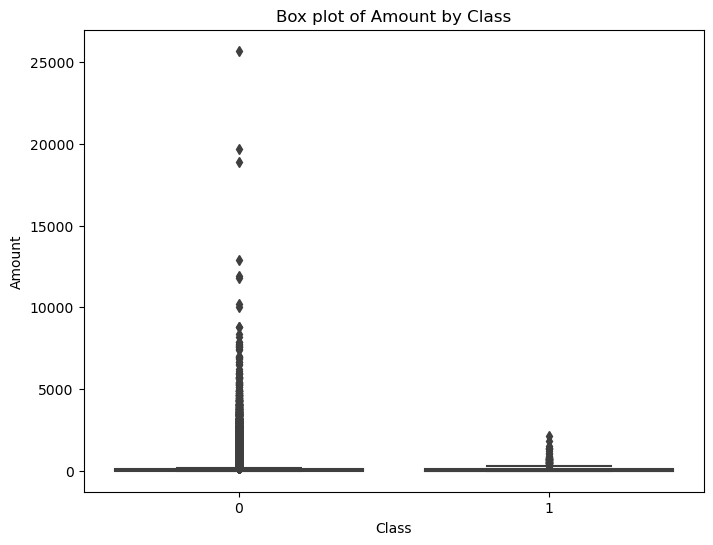

In [10]:
# Create box plot for 'Amount' based on 'Class'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Box plot of Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

In [11]:
from ydata_profiling import ProfileReport
profile=ProfileReport( data)


In [12]:
# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

In [13]:
# Initialize PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [14]:
# Scale the numerical features
X_scaled = scaler.fit_transform(X)

In [17]:
# Applying RandomUnderSampler for balancing the dataset
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_scaled, y)

In [18]:
# Convert the resampled data into DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['Class'])

# Concatenate X and y DataFrames
resampled_data = pd.concat([X_resampled_df, y_resampled_df], axis=1)

In [20]:
X_resampled_df["Amount"].describe()

count    984.000000
mean      -0.151262
std        1.198372
min       -2.013010
25%       -1.478798
50%       -0.126338
75%        0.894408
max        2.509052
Name: Amount, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_df, y_resampled_df, test_size=0.2, random_state=42)

In [ ]:
# Split the scaled data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2,stratify=y, random_state=42)


In [22]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [23]:
# Fit the model to the training data
rf_model.fit(X_train, y_train)


C:\Users\mannh\AppData\Local\Temp\ipykernel_13296\1766314647.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [76]:
# Predict on the testing data
y_pred_rf = rf_model.predict(X_test)

In [47]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.9238578680203046


In [82]:
import joblib
joblib.dump(rf_model, r'C:\Users\mannh\Dta science By Upgrad\ASSIGHNMENTS\credit card data\prediction_model.joblib')


['C:\\Users\\mannh\\Dta science By Upgrad\\ASSIGHNMENTS\\credit card data\\prediction_model.joblib']

In [50]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



In [51]:
from scipy.stats import randint
# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['auto', 'sqrt', 'log2']
}


In [52]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, random_state=42, verbose=2)

In [53]:
# Fit the model with hyperparameter tuning
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\mannh\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029F37C5D610>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029F3332E350>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029F37265D50>},
                   random_state=42, verbose=2)

In [54]:
from sklearn.pipeline import Pipeline
# Define preprocessing steps
pipeline = Pipeline(steps=[
    ('preprocessor', scaler),
    ('undersampler', undersample),
    ('classifier', rf_model)
])

In [55]:
pipeline

Pipeline(steps=[('preprocessor', PowerTransformer()),
                ('undersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='majority')),
                ('classifier', RandomForestClassifier(random_state=42))])

In [56]:
# Get the best parameters and the best estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

In [57]:
# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 137}


In [58]:
# Make predictions using the best estimator
y_pred = best_estimator.predict(X_test)

In [59]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9137055837563451


# Evaluate the model


In [65]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        99
           1       0.95      0.88      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



In [61]:
# Calculate predicted probabilities
y_prob = random_search.predict_proba(X_test)[:,1]

In [62]:
# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.976705833848691


In [63]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

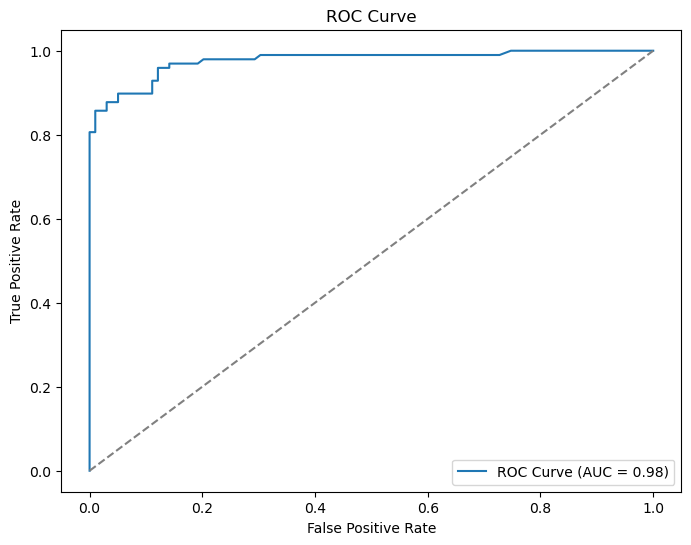

In [64]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [69]:
rf_precision = precision_score(y_test, y_pred)
print(f"Precision: {rf_precision}")

Precision: 0.945054945054945


In [70]:
rf_recall = recall_score(y_test, y_pred)
print(f"Recall: {rf_recall}")

Recall: 0.8775510204081632


In [73]:
rf_f1_score = f1_score(y_test, y_pred)
print(f"F1 Score: {rf_f1_score}")

F1 Score: 0.91005291005291


In [ ]:
# Shape of the training dataset
train_shape = X_train.shape
print("Training dataset shape:", train_shape)

# Shape of the testing dataset
test_shape = X_test.shape
print("Testing dataset shape:", test_shape)

In [74]:
# Count of each class in the training dataset
train_class_count = y_train.value_counts()
print("Training dataset class counts:")
print(train_class_count)

# Count of each class in the testing dataset
test_class_count = y_test.value_counts()
print("\nTesting dataset class counts:")
print(test_class_count)


Training dataset class counts:
Class
1        394
0        393
Name: count, dtype: int64

Testing dataset class counts:
Class
0        99
1        98
Name: count, dtype: int64


In [88]:
import pickle


In [90]:
filename = 'creditcardfault.sav'
pickle.dump(rf_model, open(filename, 'wb'))

In [92]:
# loading the saved model
loaded_model = pickle.load(open('creditcardfault.sav', 'rb'))

In [97]:
import numpy as np

# Define the input data
input_data = (5, 0.025302292, -0.140513811, 1.191137773, -0.707978812, 0.430490321, 0.458973192, 0.611049587, -0.092628606, 0.180811357, 0.45178842, 0.036071305, 0.877238898, -0.289721143, 0.630992452, 0.56020086, 0.741131551, 0.421766319, 0.362503889, -0.242748847, -0.076400297, -0.187739355, -0.538518113, -0.050464986, -0.631553062, -0.456479962, 0.25266987, 0.06668093, 0.095811507, 6901.49)

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data using the scaler
std_data = scaler.transform(input_data_reshaped)

# Make predictions using the best estimator (classifier)
prediction = best_estimator.predict(std_data)

# Print the prediction
if prediction[0] == 0:
    print('The transaction is normal')
else:
    print('The transaction is fraud')


The transaction is normal


C:\Users\mannh\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
C:\Users\mannh\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [96]:
import numpy as np
input_data = (1,-1.358354062,-1.340163075,1.773209343,0.379779593,
              -0.503198133,1.800499381,0.791460956,0.247675787,-1.514654323,
              0.207642865,0.624501459,0.066083685,0.717292731,-0.165945923,
              2.345864949,-2.890083194,1.109969379,-0.121359313,-2.261857095,
              0.524979725,0.247998153,0.771679402,0.909412262,-0.689280956,
              -0.327641834,-0.139096572,-0.055352794,-0.059751841,378.66
)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('the transaction is normal')
else:
  print('The transaction is fraud')

[0]
the transaction is normal


C:\Users\mannh\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [98]:
input_data = (406,-2.312226542,1.951992011,-1.609850732,3.997905588,
              -0.522187865,-1.426545319,-2.537387306,
              1.391657248,-2.770089277,-2.772272145,3.202033207,
              -2.899907388,-0.595221881,-4.289253782,0.38972412,-1.14074718,
              -2.830055675,-0.016822468,0.416955705,
              0.126910559,0.517232371,-0.035049369,-0.465211076,0.320198199,
              0.044519167,0.177839798,0.261145003,-0.143275875,0
)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('the transaction is normal')
else:
  print('The transaction is fraud')

[1]
The transaction is fraud


C:\Users\mannh\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
406	-2.312226542	1.951992011	-1.609850732	3.997905588	-0.522187865	-1.426545319	-2.537387306	1.391657248	-2.770089277	-2.772272145	3.202033207	-2.899907388	-0.595221881	-4.289253782	0.38972412	-1.14074718	-2.830055675	-0.016822468	0.416955705	0.126910559	0.517232371	-0.035049369	-0.465211076	0.320198199	0.044519167	0.177839798	0.261145003	-0.143275875	0	1

